In [1]:
import json
from pprint import pprint
import datetime
%pylab inline

feminism 1423353600
feminist 1425772800
feminists 1426982400
feminazis 1425772800


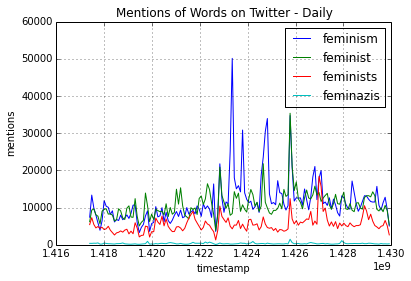

In [39]:
words = ['feminism', 'feminist', 'feminists', 'feminazis']

dataset = {}

pylab.xlabel('timestamp')
pylab.ylabel('mentions')
pylab.title('Mentions of Words on Twitter - Daily')
pylab.grid(True)

for word in words:
    fn = '../data/counts/' + word + '_mentions_daily_20141201_20150425.json'
    jf = open(fn, 'r')
    femjson = json.load(jf)
    peak = femjson['response']['results'][0]['stats']['peak']['mentions']
    print(word, peak)
    
    data = femjson['response']['results'][0]['data']
    
    ts = []
    mentions = []
    for dtpoint in data:
        ts.append(dtpoint['timestamp'])
        mentions.append(dtpoint['mentions'])
        
    dataset[word] = {'ts': ts, 'mentions':mentions}
        
    pylab.plot(ts, mentions, label=word)
    pylab.legend(loc='upper right')

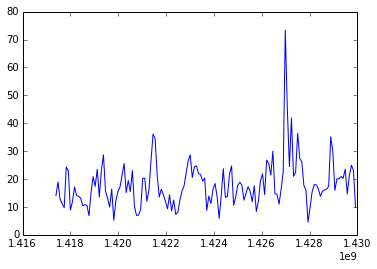

In [38]:
fnz = dataset['feminazis']['mentions']
fems = dataset['feminists']['mentions']
naziratio  = [fems[i]/fnz[i] for i in range(len(fnz))]

pylab.plot(ts, naziratio, label='feminists/feminazis')